# Problem Statement :- Develop a model to predict customer churn for a subscription- based service or business.

In [65]:
###---------------------------
### Import Necessory Libraries
###---------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils import resample

import warnings
warnings.filterwarnings('ignore')

In [66]:
###-------------
### Load Dataset
###-------------

file_path = '/content/drive/MyDrive/Churn prediction/'

data = pd.read_csv(file_path + 'Churn_Modelling.csv')

In [67]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [68]:
data.shape

(10000, 14)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [70]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [71]:
# Drop Unnecessory columns which will not make any impact on result..

data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Some Data Visualization..

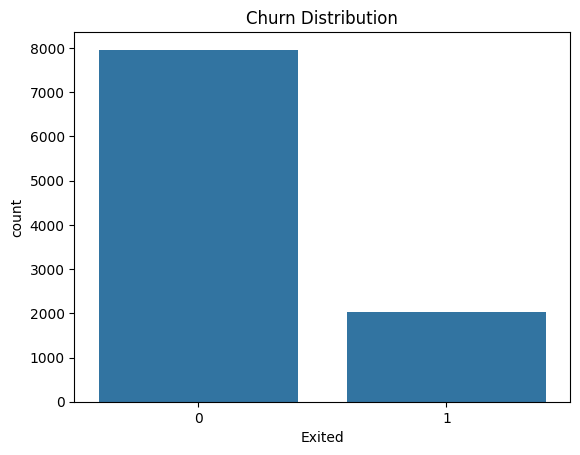

In [72]:
sns.countplot(x='Exited', data=data)
plt.title('Churn Distribution')
plt.show()

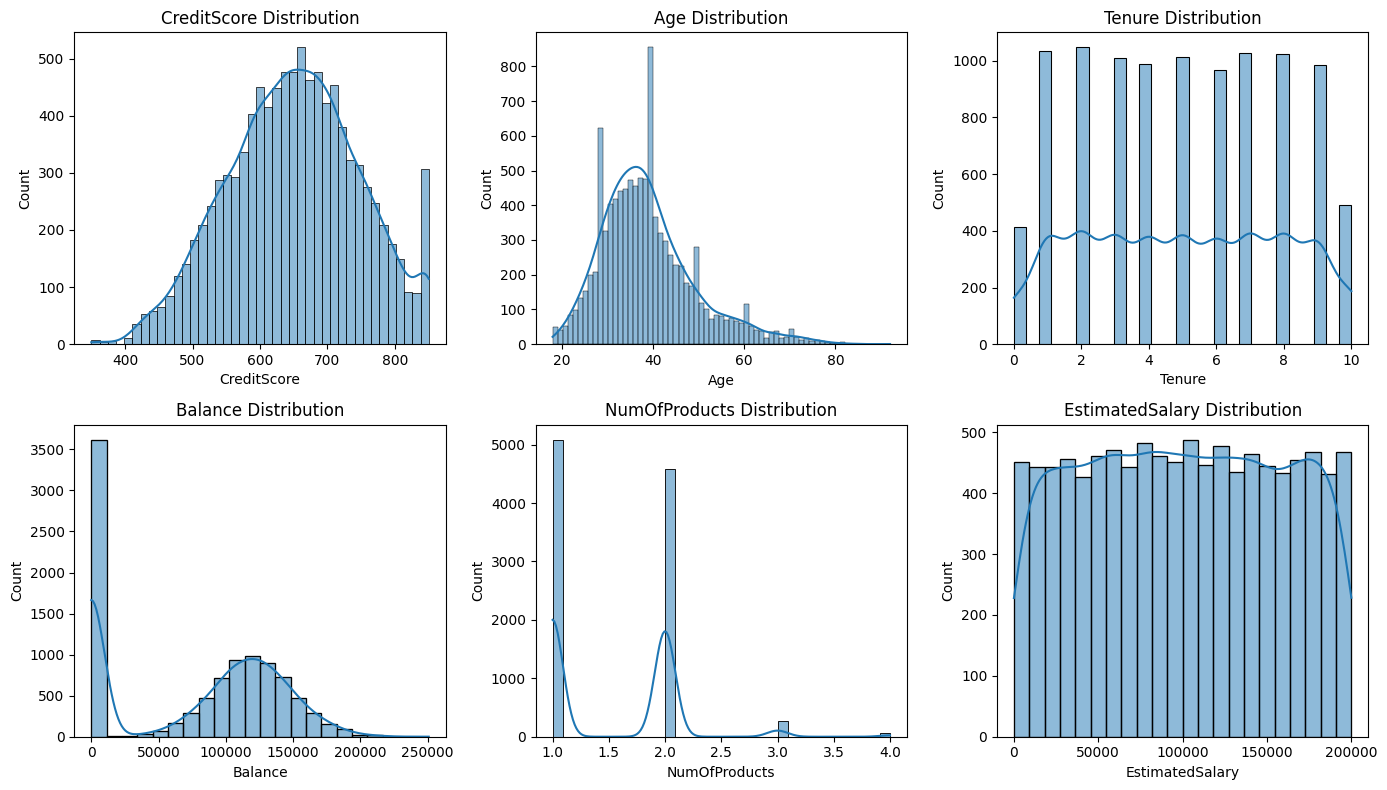

In [73]:
# Numerical features distribution
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

plt.figure(figsize=(14, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[feature], kde=True)
    plt.title(f'{feature} Distribution')

plt.tight_layout()
plt.show()

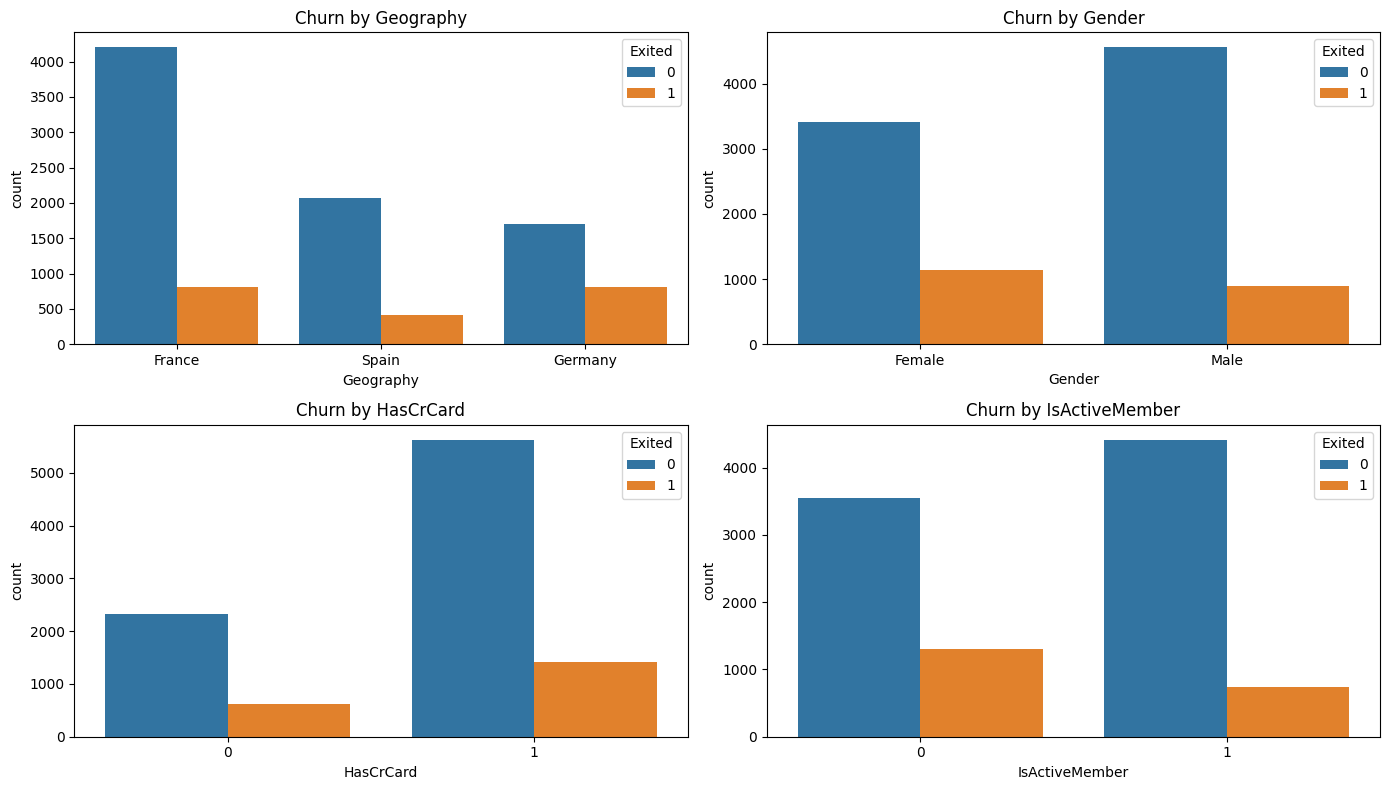

In [74]:
# Categorical features
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

plt.figure(figsize=(14, 8))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=feature, hue='Exited', data=data)
    plt.title(f'Churn by {feature}')

plt.tight_layout()
plt.show()


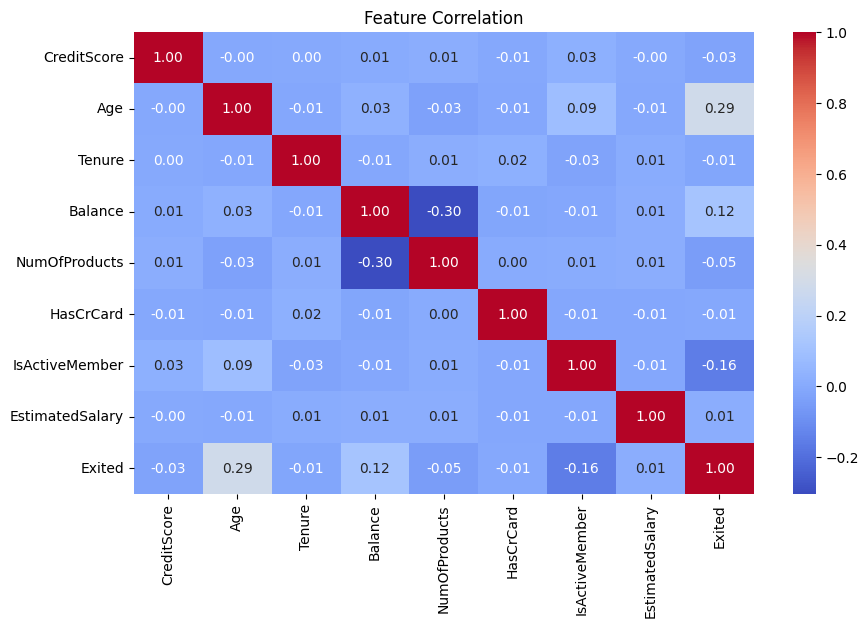

In [75]:
# Correlation heatmap

plt.figure(figsize=(10, 6))
numerical_data = data.select_dtypes(include=['number'])
sns.heatmap(numerical_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

In [76]:
# Encode categorical variables

label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

Checking for Imbalanced Data

In [77]:
data['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [78]:
from sklearn.utils import resample

# Separate the majority and minority classes
data_majority = data[data.Exited == 0]
data_minority = data[data.Exited == 1]

# Oversample the minority class
data_minority_upsampled = resample(data_minority,
                                 replace=True,    # Sample with replacement
                                 n_samples=len(data_majority),  # Match majority class
                                 random_state=42)  # Reproducible results

# Combine majority and upsampled minority
balanced_data = pd.concat([data_majority, data_minority_upsampled])

In [79]:
balanced_data.shape

(15926, 11)

# Now we start with model Building and evaluate their performance..

In [80]:
X = balanced_data.drop('Exited',axis=1)

y = balanced_data['Exited']

In [81]:
# Split the dataset into train and test data.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Use Different Algorithms :-

1) Logistic Regression :-

In [83]:
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.697112366603892
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.71      0.70      1605
           1       0.70      0.68      0.69      1581

    accuracy                           0.70      3186
   macro avg       0.70      0.70      0.70      3186
weighted avg       0.70      0.70      0.70      3186

Confusion Matrix:
[[1143  462]
 [ 503 1078]]


2) Decision Tree Classifier

In [84]:
dec_tree = DecisionTreeClassifier()

# Train the model
dec_tree.fit(X_train, y_train)

# Make predictions
y_pred = dec_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9274952919020716
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.87      0.92      1605
           1       0.88      0.98      0.93      1581

    accuracy                           0.93      3186
   macro avg       0.93      0.93      0.93      3186
weighted avg       0.93      0.93      0.93      3186

Confusion Matrix:
[[1402  203]
 [  28 1553]]


3) Random Forest Classifier :-

In [85]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9510357815442562
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1605
           1       0.92      0.98      0.95      1581

    accuracy                           0.95      3186
   macro avg       0.95      0.95      0.95      3186
weighted avg       0.95      0.95      0.95      3186

Confusion Matrix:
[[1474  131]
 [  25 1556]]


In [86]:
# Feature importance

importances = rf.feature_importances_
feature_names = X.columns
print("Feature Importances:")
for i, feature in enumerate(feature_names):
    print(f"{feature}: {importances[i]:.3f}")

Feature Importances:
CreditScore: 0.136
Geography: 0.039
Gender: 0.020
Age: 0.257
Tenure: 0.081
Balance: 0.144
NumOfProducts: 0.131
HasCrCard: 0.019
IsActiveMember: 0.037
EstimatedSalary: 0.138


# Save the model

In [87]:
import pickle

# Assuming 'model' is your trained model (e.g., LogisticRegression, RandomForest, etc.)
with open('Customer churn prediction.pkl', 'wb') as f:
    pickle.dump(rf, f)